In [ ]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from glob import glob
import os
import re

In [34]:
algorithm = "pso"
problem = "tsp"

workingPath = f"D:\\experimentData\\{algorithm}\\{problem}\\*"

testCaseFolder = glob(workingPath)
testCaseFolder

['D:\\experimentData\\pso\\tsp\\Berlin52',
 'D:\\experimentData\\pso\\tsp\\Bier127',
 'D:\\experimentData\\pso\\tsp\\Eil101',
 'D:\\experimentData\\pso\\tsp\\Pr76',
 'D:\\experimentData\\pso\\tsp\\St70']

## explore each test case values

In [ ]:
def readTestCase(testCaseFolder, countDiversityWin, countGlobalFitnessWin, isPlot = False):
    # this function will read file, find mean
    dfGlobalFitness = pd.DataFrame(index = range(1,1001))
    dfDiversity = pd.DataFrame(index = range(1,1001))
    dfExploration = pd.DataFrame(index = range(1,1001))
    dfRuntime = pd.DataFrame(index = range(1,1001))

    for rng in glob(f"{testCaseFolder}\\*"):
        historyFile = glob(f"{rng}\\**\\*.txt", recursive = True)
        meanResult = np.zeros((1000, 7))
        # print("-------------")
        for trialFile in historyFile:
            f = open(trialFile, "r")
            lines = f.readlines()
            trialData = np.array([re.findall(r"-?\ *[0-9]+\.?[0-9]*(?:[Ee]\ *-?\ *[0-9]+)?", line) for line in lines], dtype = float)
            meanResult += trialData

        meanResult = meanResult/30
        rngName = os.path.basename(rng)
        dfGlobalFitness[f"{rngName}"] = meanResult[:, 2]
        dfDiversity[f"{rngName}"] = meanResult[:, 3]
        dfExploration[f"{rngName}"] = meanResult[:, 4]
        dfRuntime[f"{rngName}"] = meanResult[:, 6]

    testCaseName = os.path.basename(testCaseFolder)

    lastGen = -1
    firstGen = 0

    if problem == "maxcut":
        maxFitnessRng = dfGlobalFitness.iloc[lastGen].idxmax()
        countGlobalFitnessWin[maxFitnessRng] +=1
        print("o")
    else:
        maxFitnessRng = dfGlobalFitness.iloc[lastGen].idxmin()
        countGlobalFitnessWin[maxFitnessRng] +=1
    maxDiversityRng = dfDiversity.iloc[firstGen].idxmax()
    countDiversityWin[maxDiversityRng] += 1

    if isPlot:
        fig, axes = plt.subplots(nrows= 4, ncols = 1)
        fig.suptitle(f"{algorithm}-{problem}({testCaseName})");
        fig.set_size_inches(8, 20);
        # fig.subplots_adjust(top=3)


        dfGlobalFitness.plot(title= f"graph of global fitness", xlabel= "iteration", ylabel = "fitness", ax=axes[0], grid=True)
        dfDiversity.plot(title= f"graph of diversity", xlabel= "iteration", ylabel = "diversity", ax=axes[3], grid=True)
        dfExploration.plot(title= f"graph of exploration", xlabel= "iteration", ylabel = "exploration rate", ax=axes[2], grid=True)
        dfRuntime.plot(title= f"graph of runtime", xlabel= "iteration", ylabel = "runtime (second)", ax=axes[1], grid=True)
        fig.tight_layout();
        fig.subplots_adjust(top=0.95);

        
        folderPath = f"./plot_result/{algorithm}/{problem}"
        if not os.path.exists(folderPath):
            os.makedirs(folderPath)
        fig.savefig(f"{folderPath}/{algorithm}-{problem}({testCaseName}).png");
        

In [36]:
countDiversityWin = {"BeamSplitter":0, "Ibm": 0, "Mt19937": 0, "QuasiRandom": 0}
countGlobalFitnessWin = {"BeamSplitter":0, "Ibm": 0, "Mt19937": 0, "QuasiRandom": 0}
for folder in testCaseFolder:
    readTestCase(folder, countDiversityWin, countGlobalFitnessWin)

In [37]:
print(countGlobalFitnessWin)

{'BeamSplitter': 2, 'Ibm': 1, 'Mt19937': 1, 'QuasiRandom': 1}


Text(0.5, 1.0, 'win of average last generation global fitness')

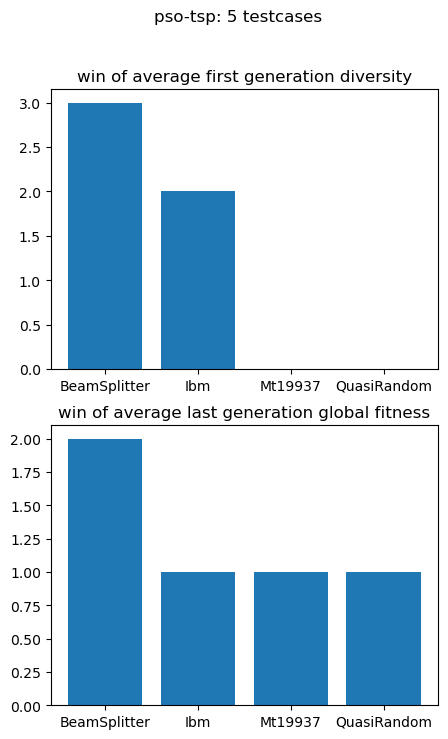

In [38]:
fig, axes = plt.subplots(nrows= 2, ncols = 1)
fig.set_size_inches(5, 8)
# fig.tight_layout()
fig.suptitle(f"{algorithm}-{problem}: {len(testCaseFolder)} testcases");
# plt.title("win of average first generation diversity")
names = list(countDiversityWin.keys())
valuesDiversity = list(countDiversityWin.values())
valuesFitness = list(countGlobalFitnessWin.values())
axes[0].bar(range(len(countDiversityWin)), valuesDiversity, tick_label=names)
axes[0].set_title("win of average first generation diversity")
axes[1].bar(range(len(countGlobalFitnessWin)), valuesFitness, tick_label=names)
axes[1].set_title("win of average last generation global fitness")

## create summary heatmap


In [ ]:
import seaborn as sns
e = 1000 # epoch
p = 100  # population size

In [ ]:
def isQuantum(rngLabel):
    # encode type od RNG into quantum and psedo
    if rngLabel == "BeamSplitter" or rngLabel == "Ibm":
        return "quantum"
    return "pseudo"

def create_heatmap(testCaseFolder, heatMapDict, quantumDict, problem, e,p):
    dfGlobalFitness = pd.DataFrame(index = range(1,e+1))
    dfDiversity = pd.DataFrame(index = range(1,e+1))
    dfExploration = pd.DataFrame(index = range(1,e+1))
    dfRuntime = pd.DataFrame(index = range(1,e+1))

    # extract data and mean 30 trials
    for rng in glob(f"{testCaseFolder}\\*"):
        # if("QuasiRandom" in rng):
        #     continue
        historyFile = glob(f"{rng}\\**\\e={e}p={p}_history.txt", recursive = True)
        meanResult = np.zeros((e, 7))
        # print("-------------")
        for trialFile in historyFile:
            # print(trialFile)
            f = open(trialFile, "r")
            lines = f.readlines()

            # print([re.findall(r"[-+]?(?:\d*\.*\d+)", line) for line in lines])
            trialData = np.array([re.findall(r"-?\ *[0-9]+\.?[0-9]*(?:[Ee]\ *-?\ *[0-9]+)?", line) for line in lines], dtype = float)
            meanResult += trialData

        meanResult = meanResult/30
        rngName = os.path.basename(rng)
        
        dfGlobalFitness[f"{rngName}"] = meanResult[:, 2]
        dfDiversity[f"{rngName}"] = meanResult[:, 3]
        dfExploration[f"{rngName}"] = meanResult[:, 4]
        dfRuntime[f"{rngName}"] = meanResult[:, 6]

    testCaseName = os.path.basename(testCaseFolder)

    # index for last generation and first generation
    lastGen = -1
    firstGen = 0
 
    # find the best diversity/ global fitness in that specific case
    probName = os.path.basename(problem)
    if probName == "maxcut":
        print("maxcut")
        maxFitnessRng = dfGlobalFitness.iloc[lastGen].idxmax()
    else:
        maxFitnessRng = dfGlobalFitness.iloc[lastGen].idxmin()
    maxDiversityRng = dfDiversity.iloc[firstGen].idxmax()
    print(f"Diverge win: {maxDiversityRng}, Fitness win: {maxFitnessRng}")
    
    # fine update
    heatMapDict[maxFitnessRng][maxDiversityRng] += 1

    # broadly update
    quantumDict[isQuantum(maxFitnessRng)][isQuantum(maxDiversityRng)] += 1

    print("success")
    return heatMapDict

In [ ]:
# declare dictionary to store win count case
heatMapDict = {
    "BeamSplitter":{"BeamSplitter": 0 ,"Ibm": 0,"Mt19937": 0,"QuasiRandom": 0},
    "Ibm":{"BeamSplitter": 0 ,"Ibm": 0,"Mt19937": 0,"QuasiRandom": 0},
    "Mt19937":{"BeamSplitter": 0 ,"Ibm": 0,"Mt19937": 0,"QuasiRandom": 0},
    "QuasiRandom": {"BeamSplitter": 0 ,"Ibm": 0,"Mt19937": 0,"QuasiRandom": 0}
}

quantumDict = {
    "quantum": {"quantum": 0, "pseudo": 0},
    "pseudo": {"quantum": 0, "pseudo": 0}
}

for algorithm in glob("D:\\QuantumResult\\historyMAY\\*"):
    for problem in glob(f"{algorithm}\\*"):
        for testCase in glob(f"{problem}\\*"):
        # testCaseFolder = glob(workingPath)
            print(testCase)
            create_heatmap(testCase, heatMapDict, quantumDict, problem, e, p)

D:\QuantumResult\historyMAY\ABC\CEC2021\F102021
Diverge win: Ibm, Fitness win: Ibm
o
D:\QuantumResult\historyMAY\ABC\CEC2021\F12021
Diverge win: Mt19937, Fitness win: Ibm
o
D:\QuantumResult\historyMAY\ABC\CEC2021\F22021
Diverge win: BeamSplitter, Fitness win: BeamSplitter
o
D:\QuantumResult\historyMAY\ABC\CEC2021\F32021
Diverge win: Mt19937, Fitness win: Mt19937
o
D:\QuantumResult\historyMAY\ABC\CEC2021\F42021
Diverge win: Ibm, Fitness win: Mt19937
o
D:\QuantumResult\historyMAY\ABC\CEC2021\F52021
Diverge win: Ibm, Fitness win: QuasiRandom
o
D:\QuantumResult\historyMAY\ABC\CEC2021\F62021
Diverge win: Mt19937, Fitness win: Mt19937
o
D:\QuantumResult\historyMAY\ABC\CEC2021\F72021
Diverge win: BeamSplitter, Fitness win: QuasiRandom
o
D:\QuantumResult\historyMAY\ABC\CEC2021\F82021
Diverge win: Ibm, Fitness win: Mt19937
o
D:\QuantumResult\historyMAY\ABC\CEC2021\F92021
Diverge win: Ibm, Fitness win: QuasiRandom
o
D:\QuantumResult\historyMAY\ABC\maxcut\Brock200_2
maxcut
Diverge win: Ibm, Fitne

In [ ]:
# show results
for key,item in heatMapDict.items():
    print(key, item)

for key,item in quantumDict.items():
    print(key, item)

BeamSplitter {'BeamSplitter': 11, 'Ibm': 14, 'Mt19937': 16, 'QuasiRandom': 0}
Ibm {'BeamSplitter': 7, 'Ibm': 16, 'Mt19937': 18, 'QuasiRandom': 0}
Mt19937 {'BeamSplitter': 19, 'Ibm': 13, 'Mt19937': 19, 'QuasiRandom': 0}
QuasiRandom {'BeamSplitter': 12, 'Ibm': 10, 'Mt19937': 5, 'QuasiRandom': 0}
quantum {'quantum': 48, 'pseudo': 34}
pseudo {'quantum': 54, 'pseudo': 24}


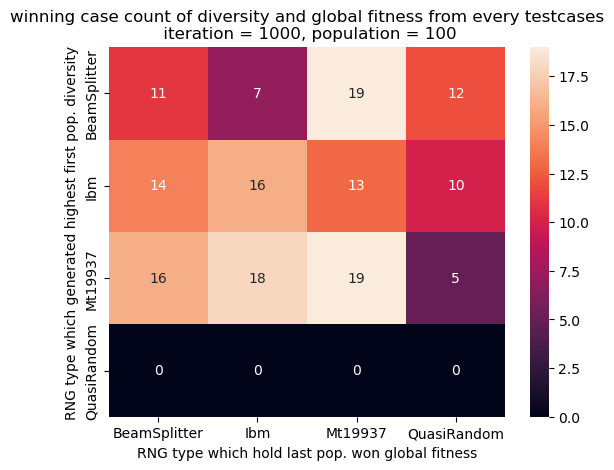

In [ ]:
# plot results
prob_matrix = pd.DataFrame(heatMapDict)
ax = sns.heatmap(prob_matrix,annot=True, fmt=".4g")
plt.title(f"winning case count of diversity and global fitness from every testcases\n iteration = {e}, population = {p}")
plt.ylabel("RNG type which generated highest first pop. diversity")
plt.xlabel("RNG type which hold last pop. won global fitness")
plt.show()

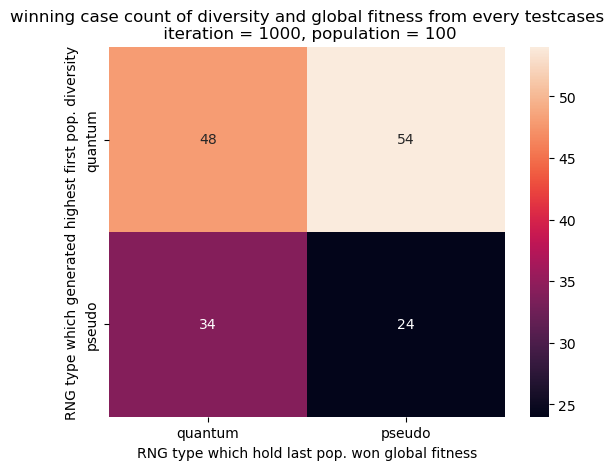

In [53]:
prob_matrix = pd.DataFrame(quantumDict)
ax = sns.heatmap(prob_matrix,annot=True, fmt=".4g")
plt.title(f"winning case count of diversity and global fitness from every testcases\n iteration = {e}, population = {p}")
plt.ylabel("RNG type which generated highest first pop. diversity")
plt.xlabel("RNG type which hold last pop. won global fitness")
plt.show()